# Cantera reactors

* [Cantera reactor documentation](https://cantera.org/documentation/docs-2.5/sphinx/html/cython/zerodim.html)

* [Cantera examples](https://cantera.org/examples/python/#python-example-reactors)
    * These are also available in your cantera installation
    * For example, at /usr/local/cantera/lib/python3.7/site-packages/cantera/examples/reactors
    

### CSTR Example

In [2]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

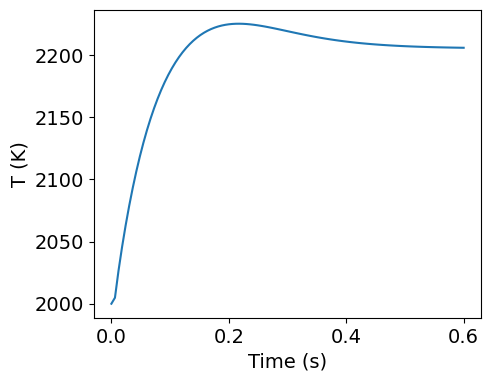

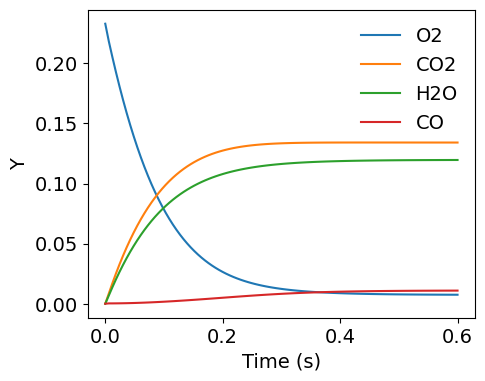

In [14]:
P  = 101325

Tin = 300                        # inlet state
Xin = 'CH4:1, O2:2, N2:7.52'

T0 = 2000.0                      # initial reactor state
X0 = 'O2:0.21, N2:0.79'

Tair = 300                       # exhaust/surrounding state
Xair = 'O2:1, N2:3.76'

Vcstr = 1                        # volume (m3)
mdotIn = 1.767                   # kg/2
nt = 100                         # number of time steps
trun = 0.6                       # run time

L_is_isoT = False                # true if isothermal, false if adiabatic

#-------------------------------------------------------------------

gasI      = ct.Solution('gri30.yaml')  # in
gasI.TPX  = Tin, P, Xin

gasE     = ct.Solution('gri30.yaml')   # exhaust
gasE.TPX = Tair, P, Xair

gas0     = ct.Solution('gri30.yaml')   # initial reactor
gas0.TPX = T0, P, X0

inlet    = ct.Reservoir(gasI)
exhaust  = ct.Reservoir(gasE)

cstr = ct.IdealGasReactor(gas0, energy='off') if L_is_isoT else ct.IdealGasReactor(gas0)
cstr.volume = Vcstr

mfcGas       = ct.MassFlowController(inlet, cstr, mdot=mdotIn)
valveExhaust = ct.Valve(cstr, exhaust, K=1000.0)
rxrNet       = ct.ReactorNet([cstr])

pressures   = P*np.ones(nt)
mdotExhaust = mdotIn*np.ones(nt)
temps       = cstr.T*np.ones(nt)
rhos        = cstr.thermo.density*np.ones(nt)
y           = np.zeros((nt, gasI.n_species))
x           = np.zeros((nt, gasI.n_species))

y[0,:] = cstr.Y

#---------- run the reactor

nsteps = nt-1
dt = trun/nsteps

time = 0.0
for i in range(nsteps) :
    time = time + dt
    rxrNet.advance(time)

    temps[i+1]       = cstr.thermo.T
    pressures[i+1]   = cstr.thermo.P
    rhos[i+1]        = cstr.thermo.density
    mdotExhaust[i+1] = valveExhaust.mass_flow_rate
    y[i+1,:]         = cstr.thermo.Y
    x[i+1,:]         = cstr.thermo.X
    
#---------- plot results

times = np.linspace(0,trun,nt)

plt.rc('font', size=14)

plt.figure(figsize=(5,4))
plt.plot(times, temps, '-')
plt.xlabel('Time (s)')
plt.ylabel('T (K)')

plt.figure(figsize=(5,4))
plt.plot(times,y[:,gasI.species_index("O2")], label="O2")
plt.plot(times,y[:,gasI.species_index("CO2")],label="CO2")
plt.plot(times,y[:,gasI.species_index("H2O")],label="H2O")
plt.plot(times,y[:,gasI.species_index("CO")], label="CO")
plt.xlabel('Time (s)')
plt.ylabel('Y')
plt.legend(frameon=False, loc='upper right');


### Examine properties

* Python's ```dir``` function is convenient to see a list of reactor properties
    * Try out ```dir(cstr)```
* ```cstr.thermo``` gives access to the underlying thermo object.
    * For example: ```cstr.thermo.species_names``` or other properties that we would often access through ```gas```, as in ```gas.X```.
        

In [10]:
dir(cstr)
# dir(cstr.thermo)
# dir(valveExhaust)

['T',
 'Y',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_add_inlet',
 '_add_outlet',
 '_add_wall',
 'add_sensitivity_reaction',
 'add_sensitivity_species_enthalpy',
 'chemistry_enabled',
 'component_index',
 'component_name',
 'density',
 'energy_enabled',
 'get_state',
 'inlets',
 'insert',
 'kinetics',
 'mass',
 'n_vars',
 'name',
 'outlets',
 'reactor_type',
 'set_advance_limit',
 'surfaces',
 'syncState',
 'thermo',
 'type',
 'volume',
 'walls']